In [33]:
#imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df_walmart = pd.read_csv('data\\Walmart.csv') #OR (r'data\Walmart.csv')
print("Dataset 'Walmart.csv' carregado com sucesso!")
print("\nPrimeiras 5 linhas do dataset:")
display(df_walmart.head())

Dataset 'Walmart.csv' carregado com sucesso!

Primeiras 5 linhas do dataset:


,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [35]:
print("\nInformações gerais do dataset:")
df_walmart.info()


Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [36]:
print("\nEstatísticas descritivas das colunas numéricas:")
display(df_walmart.describe())


Estatísticas descritivas das colunas numéricas:


,invoice_id,quantity,rating,profit_margin
count,10051.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,2.353493,5.825659,0.393791
std,2901.174372,1.602658,1.763991,0.090669
min,1.000000,1.000000,3.000000,0.180000
25%,2513.500000,1.000000,4.000000,0.330000
50%,5026.000000,2.000000,6.000000,0.330000
75%,7538.500000,3.000000,7.000000,0.480000
max,10000.000000,10.000000,10.000000,0.570000


In [37]:
"""Preparação para implementação do K-Means"""

# Coluna 'unit_prive' precisa ser convertida para numérica
df_walmart['unit_price'] = df_walmart['unit_price'].astype(str).str.replace('$', '', regex=False).astype(float)



In [38]:
# 2. Identificar colunas numéricas para K-Means
numerical_cols_for_kmeans = ['unit_price', 'quantity', 'rating', 'profit_margin']

# Verificar se todas as colunas selecionadas existem no DataFrame
missing_cols = [col for col in numerical_cols_for_kmeans if col not in df_walmart.columns]
if missing_cols:
    print(f"\nErro: As seguintes colunas numéricas não foram encontradas: {missing_cols}")
    print("Isso não deveria acontecer após a correção, mas é uma verificação de segurança.")
else:
    X_kmeans = df_walmart[numerical_cols_for_kmeans].copy()

In [39]:
"""Pre processamento dos dados para K-Means"""

# Valores ausentes: usar média
for col in numerical_cols_for_kmeans:
        if X_kmeans[col].isnull().any():
            mean_val = X_kmeans[col].mean()
            X_kmeans[col].fillna(mean_val, inplace=True)
            print(f"Valores ausentes na coluna '{col}' preenchidos com a média: {mean_val:.2f}")


Valores ausentes na coluna 'unit_price' preenchidos com a média: 50.63
Valores ausentes na coluna 'quantity' preenchidos com a média: 2.35


C:\Users\Rafael\AppData\Local\Temp\ipykernel_15072\1191923365.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_kmeans[col].fillna(mean_val, inplace=True)


In [40]:
""" Escalonamento dos dados """
scaler = StandardScaler()
X_kmeans_scaled = scaler.fit_transform(X_kmeans)
X_kmeans_scaled_df = pd.DataFrame(X_kmeans_scaled, columns=numerical_cols_for_kmeans)

print("\nDados numéricos selecionados e escalonados (primeiras 5 linhas):")
print(X_kmeans_scaled_df.head())


Dados numéricos selecionados e escalonados (primeiras 5 linhas):
   unit_price  quantity    rating  profit_margin
0    1.136833  2.903877  1.856305       0.950862
1   -1.670291  1.653959  2.139767       0.950862
2   -0.203178  2.903877  0.892533      -0.703591
3    0.358625  3.528836  1.459457      -0.703591
4    1.685878  2.903877 -0.298009       0.950862


In [41]:
"""4. Aplicação do K-Means"""

# Usarei 3 clusters(grupos)
#Obs: O número ideal de clusters pode ser determinado com métodos como o "Elbow Method".

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_walmart['Cluster'] = kmeans.fit_predict(X_kmeans_scaled)

print(f"\nK-Means aplicado com {n_clusters} clusters.")
print("\nContagem de pontos em cada cluster:")
print(df_walmart['Cluster'].value_counts())

print("\nPrimeiras 10 linhas do DataFrame com os rótulos de cluster:")
print(df_walmart[['unit_price', 'quantity', 'rating', 'profit_margin']].head(10))



K-Means aplicado com 3 clusters.

Contagem de pontos em cada cluster:
Cluster
0    5045
2    4459
1     547
Name: count, dtype: int64

Primeiras 10 linhas do DataFrame com os rótulos de cluster:
   unit_price  quantity  rating  profit_margin
0       74.69       7.0     9.1           0.48
1       15.28       5.0     9.6           0.48
2       46.33       7.0     7.4           0.33
3       58.22       8.0     8.4           0.33
4       86.31       7.0     5.3           0.48
5       85.39       7.0     4.1           0.48
6       68.84       6.0     5.8           0.33
7       73.56      10.0     8.0           0.18
8       36.26       2.0     7.2           0.33
9       54.84       3.0     5.9           0.33


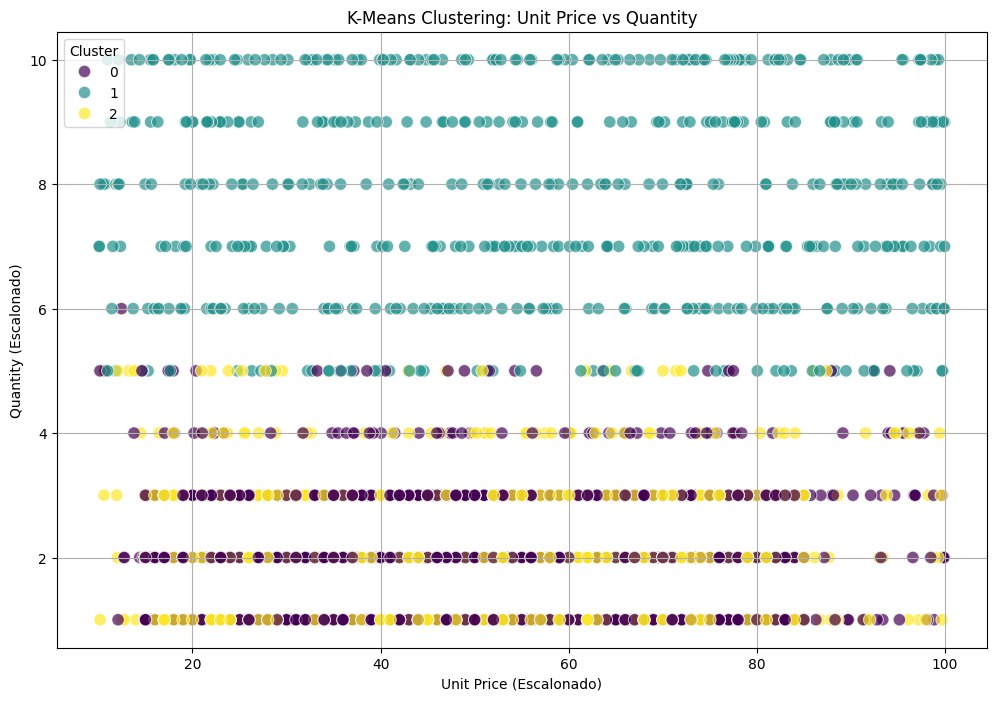

In [43]:
"""Visualização dos clusters"""

plt.figure(figsize=(12, 8))
sns.scatterplot(x='unit_price', y='quantity', hue='Cluster', palette='viridis', data=df_walmart, s=80, alpha=0.7)
plt.title(f'K-Means Clustering: Unit Price vs Quantity')
plt.xlabel('Unit Price (Escalonado)')
plt.ylabel('Quantity (Escalonado)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [44]:
print("\nMédias das características por Cluster:")
print(df_walmart.groupby('Cluster')[['unit_price', 'quantity', 'rating', 'profit_margin']].mean())



Médias das características por Cluster:
         unit_price  quantity    rating  profit_margin
Cluster                                               
0         50.509732  2.039547  5.648999       0.314938
1         56.702011  7.776965  7.095612       0.394278
2         50.018500  2.041207  5.869747       0.482947
